## Introduction
In this assignment, you will gain experience:

* Writing a Python script that accepts command line arguements,
* Reading a spreadsheet, or Comma Seperated Value (CSV) file,
* Plotting data.

The first two skills are completely new. The third is review.

### Command line arguements
By now, you should be familiar with writing Python programs using Spyder or another text editor or itegrated development environment. Until now, you've probably run your program from within the editor. For many applications, you will find it is more convenient to run Python scripts from the **command line**. This is a way of interacting with your operating system by entering commands in a **terminal**. There are differences in how terminals are opened between Windows, Linux, and OSX. I think they are:

* Windows - look for a program called `Power Shell`. 
* OSX - the program is called `terminal`,
* there are many choies in Linux, but a simple one to get is usually `gnome-terminal`.

To consolidate these choices, I recommend using the `Anaconda shell`, from the Anaconda installation directory. Many things can be done from a terminal, or a shell. 
#### File system navigation
The most important commands to start with are listing files and directories, and changing directories. 

* `dir` (Windows) this will list the files and directories in your present location.
* `ls`  (Linux OSX) list the files and directories in your present location.
* `cd` change directory. Up one directory is `cd ..`
* in Windows a heirachry of directories is indicated with a `\`, in Linux and OSX it is a `/`. For example, let's say you want to go to the CSCI250 directory on your desktop.
    * Windows - `>>cd Desktop\CSCI250`
    * Linux/OSX - `>>cd Desktop/CSCI250`

#### Running a Python script
Once you are located in the same directory as the Python script you'd like to run, you can execute it from the command line. Let's say it is called `plotWorld.py`. It would be run with the command:

`>>python plotWorld.py`

#### A command line arguement
What is meant by **command line arguemnets**. Let's suppose that your `plotWorld.py` script draws the outlines of all the countries. We'd like to tell the script to fill in the countries with some data in another file. Say, we've got a file with each country and the mean income of its inhabitants. That file is called `income.txt`. If `plotWorld.py` is written correctly, then we specify the data file as follows with a command line arguement:

`>>python plotWorld.py income.txt`

Now - `income.txt` is a command line arguement. This can be taken further. Let's say we like to use green colors to show income and that we can specify the highest number for the colors, beyond this all colors are the same. Then we could have three command line arguements:

`python plotWorld.py income.txt green 60000`

#### Implementing command line arguments in Python.
To get the command line arguements in Python, you have to import `sys`. Once this is done `sys.argv` is a list containing the command line arguements. For example:


In [1]:
from __future__ import print_function
import sys
print(sys.argv[0])

C:\Users\Davey\Anaconda3\lib\site-packages\ipykernel_launcher.py


This is a little incomprehensible, but it is a list of *strings* recording the way this Jupyter notebook was started. Remember - to convert a string to an integer or float you have to use the `int` or `float` functions.

For a simpler example, consider the assignment, where you do some plotting based on command line arguements. I run it as follows:

`>>python plotSTD.py CDC\ STD\ -\ Sheet1.csv 4 6`

* where `plotSTD.py` is the name of the program, 
* CDC\ STD\ -\ Sheet1.csv is the file containing the data
* and 4 and 6 are the columns in the data file I want to plot.

The results of `print(sys.argv)` are:

`['plotSTD.py', 'CDC STD - Sheet1.csv', '4', '6']`

Note that the first entry, or `sys.argv[0]` is the name of the python script. The other entries in the list should be logical.

### CSV files

All spread sheet software I know of has the option to save the data as CSV, (comma seperated value) format. This format frees you from the particulars of Excel or Google Sheets, or whatever you use. Python will read CSV format files, provided you import `csv`, a module for reading these files. It's simple, and demonstrated below.

In [2]:
import csv #all arguments are a string and must be changed to integer if needed
filename = "CDC STD.csv"
with open(filename) as csvfile:  # This is a nice construct that helps with exceptions.
    reader = csv.reader(csvfile) # Create csv reader
    for row in reader:
        pass


## Assignment

You are to do the following.
* Acquire the file, `CDC STD.xls` from the Moodle. Resave it as a `.csv`
* Write a program that will read that file and:
    * Accept the name of the file as a command line arguement
    * Accept the columns to be plotted as command line arguements
    * Plot a time series of the data, using a unique color for each data
    * Display a legend of the data
A demonstration of the program follows

In [3]:
run plotSTD.py CDC\ STD\ -\ Sheet1.csv 2 14

ERROR:root:File `'plotSTD.py'` not found.


In [10]:
#writing the parser for our script #remeber, the x-axis will nto have a header
#bring this stuff up top when you are reday to start putting the whole script together, b/c it doesn't quite go whiel
#in Jupyter
import sys,argparse

#creating the description for our parser
parser=argparse.ArgumentParser(description="Plot some csv files") #the filename cannot have spaces in it
#makign an argument for the filename
parser.add_argument("filename",help="Give the name of the csv file to plot")
#adding arg for x-axis column
parser.add_argument("x_axis",help="the x-axis of the plot",type=int)
#cols to be plotted agnst x-axis, allowing for multiple columsn to be plotted
parser.add_argument("cols",help="the cols to be plotted against the x-axis",type=int,nargs="+")

#we must process the arguments
args=parser.parse_args()

print("The file to be plotted is",args.filename)
print("The x-axis is",str(args.x_axis))
print("The cols to be plotted against the x-axis are",str(args.cols))

usage: ipykernel_launcher.py [-h] filename x_axis cols [cols ...]
ipykernel_launcher.py: error: the following arguments are required: x_axis, cols


SystemExit: 2

C:\Users\Davey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
#Preparing the script to be transfered over to Spyder and saved as a .py

#we will write this script so it behaves simialrly to the desired input and output, 
#except column x-axis must be specified

#importing the ground work fo stuff we will need
#I'm importing argparse b/c I feel it'd be more usefukl to use
import csv,re,argparse
from pylab import plot, subplot, ylabel, xlabel, title, show, figure, scatter, cm, linspace, legend
#from random import shuffle $onyl ne cessary if we want the colors to really be random

#all the arguments that we will be accepting

#writing all the functions that I will need to complete this task

#makign a function to extract data from a csv file and returns a list of lists containing each column in the file
def extract_data(nam_fil): #the name of the file must be input as a string with the file extension
    TheFile=nam_fil
    OurData=[] #an empty list to hold things
    with open(TheFile) as csvfile:  # This is a nice construct that helps with exceptions.
        reader = csv.reader(csvfile) # Create csv reader
        for row in reader: #every row in the reader is a list containing strings
            OurData.append(row) #we append that list into the Our Data list so we can then convert rows to columns
    #remove this loop if you can make a better loop to find the headers within the header_label function
    #for i in range(len(OurData)): #loop to propagate our headers
        #counter_a=""
        #for j in range(len(OurData[i])): #goign through a row
            #if OurData[i][j]!="":
                #counter_a=j
            #elif OurData[i][j]=="" and counter_a!="":
                #OurData[i][j]=OurData[i][counter_a]
    OurData=list(zip(*OurData)) #this transposes our rows into columns but creates a list of tuples
    #first attempt doing list comprehension, we are applying list function to every item in OurData, requires brackets
    OurData=[list(i) for i in OurData]
    return OurData

#create a function to convert the strings with numbers into floats
def str_to_flt(lst_of_lsts): #takes a list of lists that is full fo strings
    decimal_fun=re.compile(r'\d*\.?\d*') #we make a regex variable for any numbers, maybe period, any numbers
    for i in range(len(lst_of_lsts)): #we go through positions of lists within the list
        for j in range(len(lst_of_lsts[i])): #for each item in the raneg of the first list
            lst_of_lsts[i][j]=lst_of_lsts[i][j].replace(",","") #we need to eliminate commas if they exist
            fun=decimal_fun.match(lst_of_lsts[i][j]) #we then check for a mtch to the regex variable
            if fun.group()!="": #if we found a match to the regex variable
                lst_of_lsts[i][j]=float(fun.group()) #we turn into a floatign point number
    return lst_of_lsts #returns a list fo lists with all str nums as floating point numbers

#a function that finds the labels for data and teh header
def header_labels(ListOfLists,column): #takes a list fo lists and finds the header and labels
    header=""
    label_pos=[column,0] #position of label is column in the csv and position in the column
    #finding the label for the data
    for i in range(len(ListOfLists[column])):
        if (type(ListOfLists[column][i]) is float)==True:
            label=ListOfLists[column][i-1] #teh thign right above a float is probably its label
            label_pos=[column,i-1]
            break #we found what we needed, so we break it    
        else: #we now run a majority check to see if most of the things in this row are floats
            count=0 #tracking the number of floats we find
            traveled=0 #tracking how many columns we have visited
            for j in range(len(ListOfLists)): #we check to see if most of the things in other 
                #columns at this row are floats
                if (type(ListOfLists[j][i]) is float)==True:
                    count+=1
                    traveled+=1
                else:
                    traveled+=1
            if (count/traveled)>=0.5:
                label=ListOfLists[column][i-1] #if the things on either side of a str are floats, 
                #the thing above is probably that label
                label_pos=[column,i-1]
                break #if we found the label, we break it
    #systematically fginding the header
    while True:
        for i in range(len(ListOfLists[:label_pos[0]+1])): #we start by sreaching the column the label was in
            for j in range(len(ListOfLists[label_pos[0]-i])):
                tester=ListOfLists[label_pos[0]-i][label_pos[1]-j] #the item we are testing to be a header
                #the tester cannot match the label, cannot be empty str, must be a str, and nto same row as label
                if tester!=label and tester!="" and (type(tester) is str)==True and (label_pos[1]-j)!=(label_pos[1]):
                    header=tester
                    break
            if header!="" and header!=label:
                break
        if header!="" and header!=label:
            break
    if header=="": #we need a readout
        header="Ergawd!!"
    return (header,label)

#make a function to normalize the data in the csv, be able to say this thing is str and should be a number,
#fill in some number
def normal_data(lst_o_lst):
    for i in range(len(lst_o_lst)):
        for j in range(len(lst_o_lst[i])): #we're going to check every item in a list
            count=0
            travel=0
            current=lst_o_lst[i][j]
            for h in range(len(lst_o_lst)): #check against the average of tests
                test=lst_o_lst[h][j]
                if (type(lst_o_lst[h][j]) is float)==True:
                    count+=1
                    travel+=1
                else:
                    travel+=1
            average=count/travel #we average how many were floats
            #if teh thing in this row isn't a float and most other things are, then we should fill it in
            if average>=0.5 and (type(current) is float)==False:
                lst_o_lst[i][j]=float(0)
    return lst_o_lst

#make a function to simplify the list so it is all just floats
def simple_list(ug_list): #takes the list of columns
    ug_list=list(zip(*ug_list)) #puttign this back as list fo rows
    ug_list=[list(i) for i in ug_list] #convertign everythign back into lists
    while True:
        count=0
        for i in range(len(ug_list)): #deletign any rows that contain strings
            if all(isinstance(thing,float) for thing in ug_list[i])!=True:
                #all checks that every thing is true for such conditions
                #isinstance checks that this thing matches the type of object specified
                #.... for thign in myCat is list comprehenison and checks every thign in myCat
                count+=1 #thsi is to prevent us from exiting while loop
                del ug_list[i] #we delete any row that is not only floats
                break #then, we restart, the for loop so we don;t get an index error
        if count==0:
            break
    pretty_list=list(zip(*ug_list)) #puttign back as a list of columns
    pretty_list=[list(i) for i in pretty_list] #convertign everythign back into lists
    return pretty_list

#takes a list of lists and a list fo columns and returns a dictionary with header, labels, and values of each column
#we're handlign the x_axis in thsi as well just to unify things
def organizing_info(lol,x_ax,col):
    lol_dict={} #our empty dictionary to shove stuff into
    #extract teh headers and labels
    for val in col:
        lol_dict[val]={} #create a dictionary to hold these thinsg for the value of the column
        header,label=header_labels(lol,val) #unpack teh tuple from the header,labels function
        lol_dict[val]["Header"]=header #assign a key-valeu pair for the header
        lol_dict[val]["Label"]=label #assign a key-valeu paoir for the label
    #handinlign the x-axis
    lol_dict[x_ax]={}
    xheader,xlabel=header_labels(lol,x_ax)
    lol_dict[x_ax]["Header"]=xheader
    lol_dict[x_ax]["Label"]=xlabel
    #simplify the list
    lol=simple_list(lol)
    #shove evrythign into a dictionary
    for val in lol_dict.keys():
        lol_dict[val]["points"]=lol[val]
    return lol_dict

In [ ]:
#first, we must pass teh arguments from argparse to the functiosn we have written
NewData=extract_data(args.filename) #extracting data from the file
NewData=str_to_flt(NewData) #we convert all str's with nums into floats
NewData=normal_data(NewData)  #we convert the str's that shoudl be floats into filler data fo zeroes

ND_HL=header_labels(NewData,args.x_axis) #extracting the headers and labesl from the file

x_axis=int(args.x_axis) #takign the x-axis columsn argument

cols=args.cols #thsi should be a string of integers, needs to be checked

#tetsign the arguments got passed correctly
print("Testing the data was processed correctly")
print()
print("This is teh x-axis column data")
print()
print(NewData[args.x_axis])
print()
print("this is the x-axis header and label")
print(ND_HL)
print()
print("here are the columsn to be plotted against x-axis")
for thing in args.cols:
    print(NewData[thing])
print()


#figure out how to extract all of the column numbers as their own variables to plot, probably a dictionary

#make a function to plot the data, assuming nothing; it's bad practice to assume that column 0 is x-axis


In [17]:
#you can comment out each one and print more to check hwo each function works
#though, the functions are designed to wokr in a specific sequence

TheData=extract_data("CDC STD.csv") #testign to check we can extract the data

TheData=str_to_flt(TheData) #testign that all values become floats
    
TheData=normal_data(TheData) #checkign that any str's that shoudl be floats become zeroes

#testing we can bring it all together
PracCol=[2,10,14]
TheTry=organizing_info(TheData,0,PracCol)
print(TheTry[0])

TheData=simple_list(TheData) #removing any rows from the list that are nto all floats

{'Header': 'Year*', 'Label': '', 'points': [1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0]}


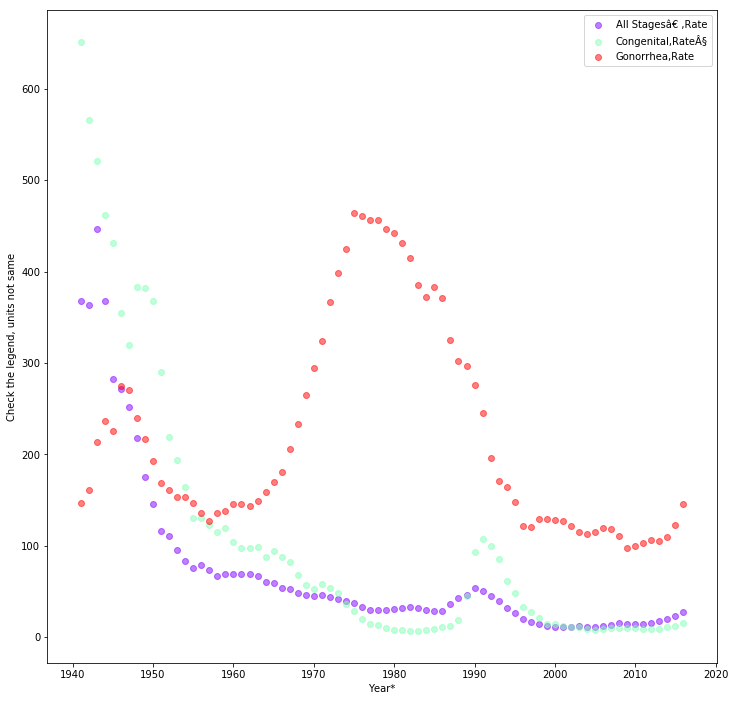

In [24]:
#TODO
#connect teh dots
#transfer and integrate fully into script in SPyder!!! 

#info must be organized befroe you can plot

#practicing plotting the data
x=TheTry[0]['points'] #we take all fo the points from the value given for x
figure(figsize=(12,12))
clrs = cm.rainbow(linspace(0, 1, len(PracCol)))

#find a way to randomly choose a row from the clrs list
clr_c=0 #our color counter, so each data set is a differenmt color
clct_labels=[] #our empty list to collect all of the headers for objects which is tehir "label"

lab_check=[] #thsi checks teh "labels" which are really the units are the same for the y-axis
for thing in PracCol:
    lab_check.append(TheTry[thing]["Label"])

if all(lab_check[0]==thing for thing in lab_check)==True: #checks all labels are teh same, if so, we do below
    #our for loop to ge through everythibng to add to the plot
    for thing in PracCol:
        choce=clrs[clr_c]
        y=TheTry[thing]['points'] #we take the value for points from the column value in the list of columns
        point=scatter(x,y,c=choce,alpha=0.5, label=TheTry[thing]["Header"])
        #find a way to connect the dots for each group
        clct_labels.append(point)
        clr_c+=1
    #we can do teh following, because the units for teh data are the same
    ylabel(TheTry[PracCol[0]]["Label"])
    
else:
    for thing in PracCol:
        choce=clrs[clr_c]
        y=TheTry[thing]['points']
        #we comdine the units (label) with the type of data (header) so we don't mix units on the ylabel
        con_cat=TheTry[thing]["Header"]+","+TheTry[thing]["Label"]
        point=scatter(x,y,c=choce,alpha=0.5, label=con_cat,norm=True)
        #find a way to connect the dots for each group
        clct_labels.append(point)
        clr_c+=1
    #we can do teh following, because the units for teh data are the same
    ylabel("Check the legend, units not same")

xlabel(TheTry[0]["Header"]) #the x-ax value is zero, must be changed to args.x_ax when moved to Spyder

legend(handles=clct_labels)

show()

In [3]:
#stuff from Physics lab for possibel reuse

#%matplotlib inline
#import numpy as np
#import matplotlib.pyplot as plt
#from __future__ import division
#import os

#try:
    #mydatafile = open("CDC_STD_td.txt")
#except:
    #print("Something went wrong. Is Your file in the same directory as this notebook?")
#Retrieving Data from Tab Delimited Text File
#a,b,c,d,e=np.genfromtxt(mydatafile, skip_header=1, delimiter="\t", usecols=(0,1,2,3,4),unpack=True)
#print(a)

In [35]:
#finding the max y-value; requires the list fo lists to get simplified first; why did I write this?
def y_find(lols,cls): #takes a list of lists and the columns to check
    basket=[max(lols[thing]) for thing in cls]
    #creates a list containg the maximum value from 
    MaxY=max(basket)
    return MaxY
print(y_find(TheData,PracCol))

575593.0


In [4]:
#MyCat goe sthrough a lot... lost of testign new ideas
myCat=[1,2,3,4,5,6]
if all(isinstance(thing,int) for thing in myCat)==True:
    #all checks that every thing is true for such conditions
    #isinstance checks that this thing matches the type of object specified
    #.... for thign in myCat is list comprehenison and checks every thign in myCat
    print("Meow!")

Meow!
